In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import matplotlib.pyplot as plt

def draw_graph(G, node_names={}, node_size=500):
    pos_nodes = nx.spring_layout(G)
    nx.draw(G, pos_nodes, with_labels=True, node_size=node_size, edge_color='gray', arrowsize=30)
    
    pos_attrs = {}
    for node, coords in pos_nodes.items():
        pos_attrs[node] = (coords[0], coords[1] + 0.08)
        
    #nx.draw_networkx_labels(G, pos_attrs, font_family='serif', font_size=20)
    
    plt.axis('off')
    axis = plt.gca()
    axis.set_xlim([1.2*x for x in axis.get_xlim()])
    axis.set_ylim([1.2*y for y in axis.get_ylim()])
    plt.show()

## 그래프 분해

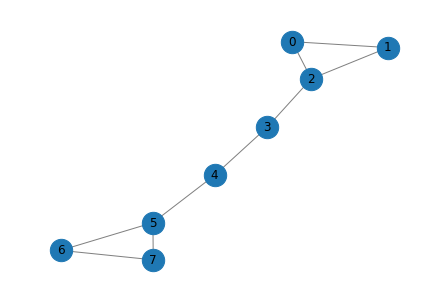

In [3]:
import networkx as nx

G = nx.barbell_graph(m1=3, m2=2)
draw_graph(G)


In [4]:
from pathlib import Path
Path("gem/intermediate").mkdir(parents=True, exist_ok=True)

[WinError 2] 지정된 파일을 찾을 수 없습니다
./gf not found. Reverting to Python implementation. Please compile gf, place node2vec in the path and grant executable permission
		Iter id: 0, Objective: 95.003, f1: 94.9995, f2: 0.00356544


(array([[ 0.00112152,  0.00889924],
        [ 0.0011202 ,  0.00889854],
        [ 0.0011214 ,  0.00889583],
        [ 0.00112671,  0.00890291],
        [ 0.00112913,  0.00892707],
        [ 0.00113638,  0.00893951],
        [ 0.00086905,  0.00888268],
        [ 0.00097742,  0.00986684],
        [ 0.00272096,  0.00713429],
        [ 0.00544277,  0.00589663],
        [ 0.01297271,  0.00283124],
        [ 0.00536792,  0.00858923],
        [ 0.00203521,  0.00535328],
        [-0.00059068,  0.00310865],
        [-0.00681739,  0.00355423],
        [-0.00681716,  0.0035538 ],
        [-0.006816  ,  0.00355346],
        [-0.00682721,  0.00354515],
        [-0.00677387,  0.00357475],
        [-0.00682056,  0.00364274],
        [-0.00693509,  0.00333216],
        [-0.00673528,  0.00366856],
        [-0.00735128,  0.00465624],
        [-0.00845172,  0.00278322]]),
 8.448416948318481)

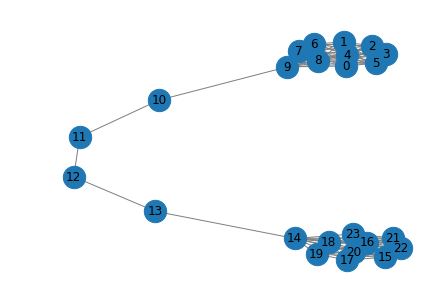

In [5]:
from gem.embedding.gf import GraphFactorization

G = nx.barbell_graph(m1=10, m2=4)
draw_graph(G)

gf = GraphFactorization(d=2, data_set=None, max_iter=10000, eta=1*10**-4, regu=1.0)
gf.learn_embedding(G)

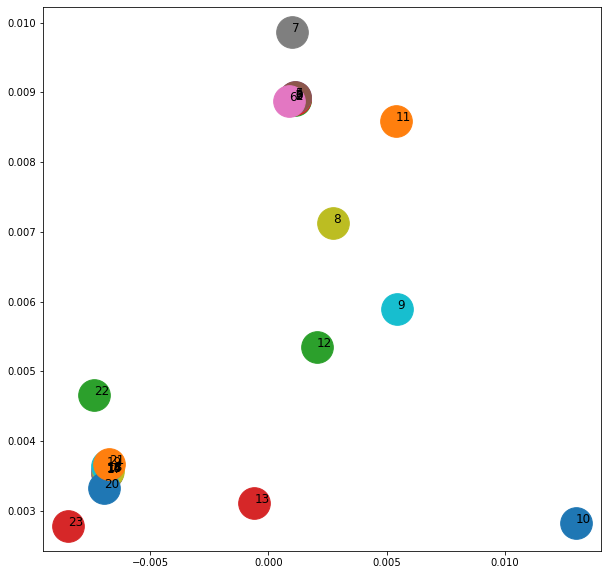

In [6]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,10))

for x in G.nodes():
    
    v = gf.get_embedding()[x]
    ax.scatter(v[0],v[1], s=1000)
    ax.annotate(str(x), (v[0],v[1]), fontsize=12)

## GraphRep

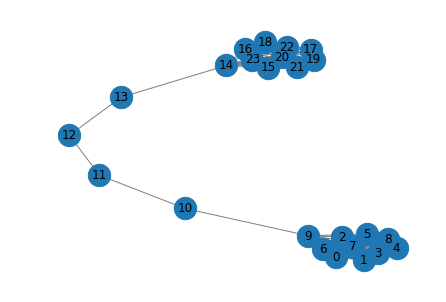

In [7]:
import networkx as nx
from karateclub.node_embedding.neighbourhood.grarep import GraRep

G = nx.barbell_graph(m1=10, m2=4)
draw_graph(G)

gr = GraRep(dimensions=2,order=3)
gr.fit(G)

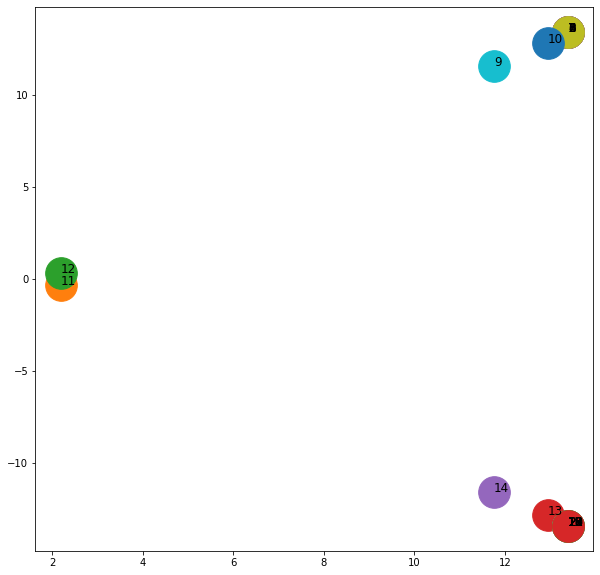

In [8]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,10))

ida = 0
idb = 1
for x in G.nodes():
    v = gr.get_embedding()[x]
    ax.scatter(v[ida],v[idb], s=1000)
    ax.annotate(str(x), (v[ida],v[idb]), fontsize=12)

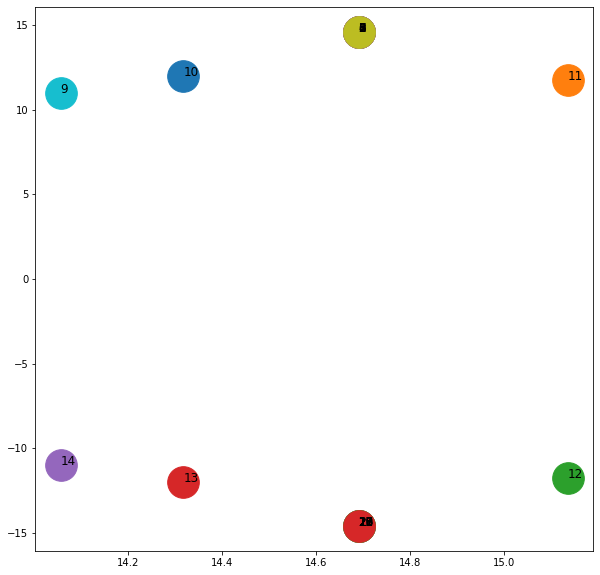

In [9]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,10))

ida = 2
idb = 3
for x in G.nodes():
    v = gr.get_embedding()[x]
    ax.scatter(v[ida],v[idb], s=1000)
    ax.annotate(str(x), (v[ida],v[idb]), fontsize=12)

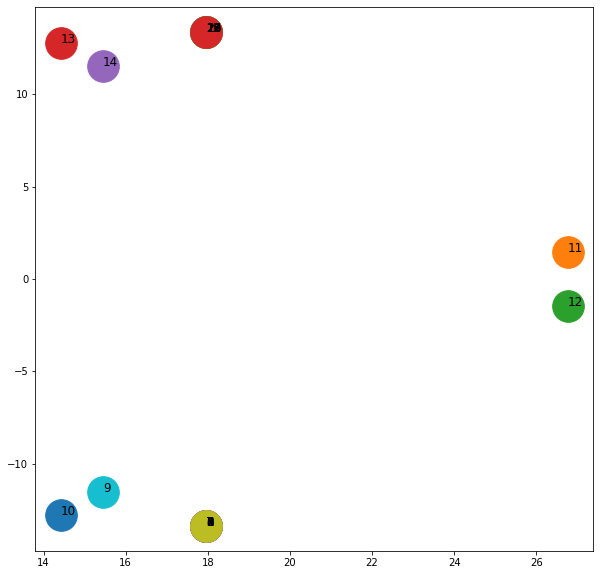

In [10]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,10))

ida = 4
idb = 5
for x in G.nodes():
    v = gr.get_embedding()[x]
    ax.scatter(v[ida],v[idb], s=1000)
    ax.annotate(str(x), (v[ida],v[idb]), fontsize=12)

## HOPE(고차 근접 보전 임베딩)

SVD error (low rank): 0.052092


(array([[ 0.07024409,  0.07024348,  0.07024409,  0.07024348],
        [ 0.07024409,  0.07024348,  0.07024409,  0.07024348],
        [ 0.07024409,  0.07024348,  0.07024409,  0.07024348],
        [ 0.07024409,  0.07024348,  0.07024409,  0.07024348],
        [ 0.07024409,  0.07024348,  0.07024409,  0.07024348],
        [ 0.07024409,  0.07024348,  0.07024409,  0.07024348],
        [ 0.07024409,  0.07024348,  0.07024409,  0.07024348],
        [ 0.07024409,  0.07024348,  0.07024409,  0.07024348],
        [ 0.07024409,  0.07024348,  0.07024409,  0.07024348],
        [ 0.07104037,  0.07104201,  0.07104037,  0.07104201],
        [ 0.00797181,  0.00799433,  0.00797181,  0.00799433],
        [ 0.00079628,  0.00099787,  0.00079628,  0.00099787],
        [-0.00079628,  0.00099787, -0.00079628,  0.00099787],
        [-0.00797181,  0.00799433, -0.00797181,  0.00799433],
        [-0.07104037,  0.07104201, -0.07104037,  0.07104201],
        [-0.07024409,  0.07024348, -0.07024409,  0.07024348],
        

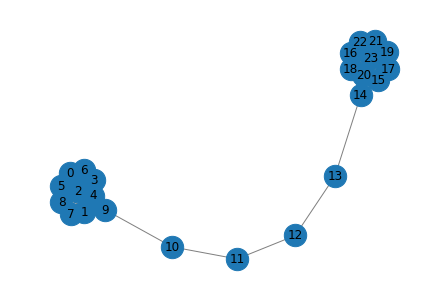

In [11]:
import networkx as nx
from gem.embedding.hope import HOPE

G = nx.barbell_graph(m1=10, m2=4)
draw_graph(G)

hp = HOPE(d=4, beta=0.01)
hp.learn_embedding(G)

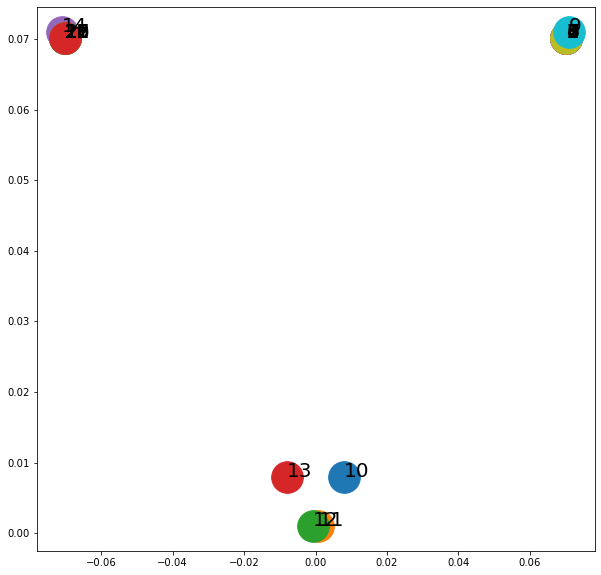

In [12]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,10))

for x in G.nodes():
    
    v = hp.get_embedding()[x,2:]
    ax.scatter(v[0],v[1], s=1000)
    ax.annotate(str(x), (v[0],v[1]), fontsize=20)

## DeepWalk

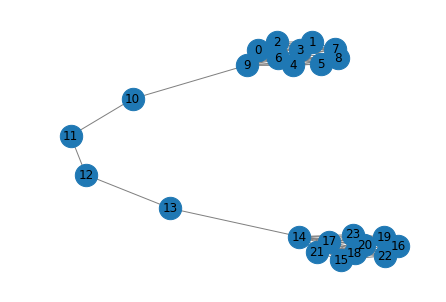

In [13]:
import networkx as nx
from karateclub.node_embedding.neighbourhood.deepwalk import DeepWalk

G = nx.barbell_graph(m1=10, m2=4)
draw_graph(G)

dw = DeepWalk(dimensions=2)
dw.fit(G)

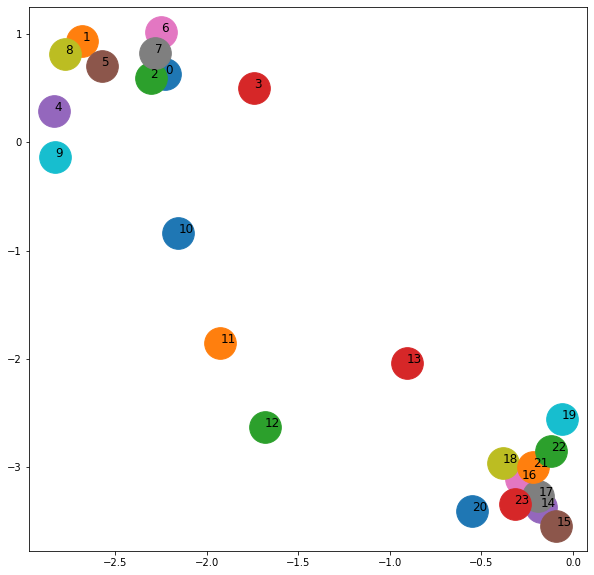

In [14]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,10))

for x in G.nodes():
    
    v = dw.get_embedding()[x]
    ax.scatter(v[0],v[1], s=1000)
    ax.annotate(str(x), (v[0],v[1]), fontsize=12)

## Node2Vec

Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 15.24it/s]


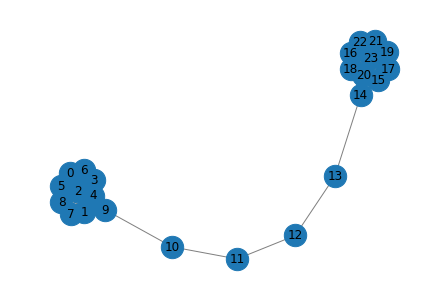

In [15]:
import networkx as nx
from node2vec import Node2Vec

G = nx.barbell_graph(m1=10, m2=4)
draw_graph(G)

node2vec = Node2Vec(G, dimensions=2)
model = node2vec.fit(window=10)
embeddings = model.wv

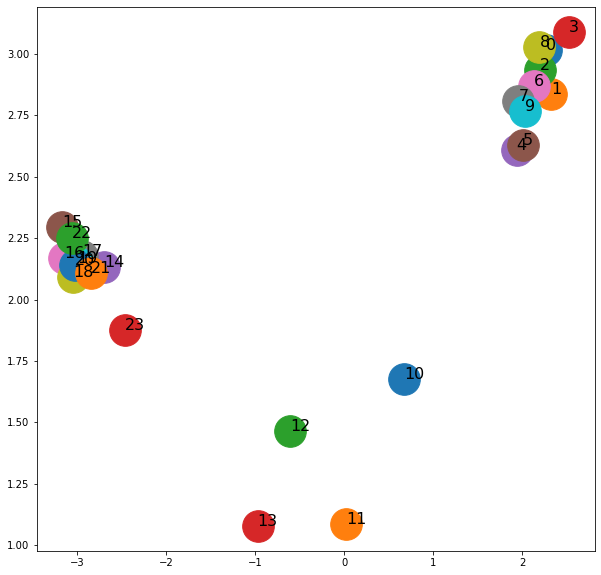

In [16]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,10))

for x in G.nodes():
    
    v = model.wv[str(x)]
    ax.scatter(v[0],v[1], s=1000)
    ax.annotate(str(x), (v[0],v[1]), fontsize=16)

plt.show()

## Edge2Vec

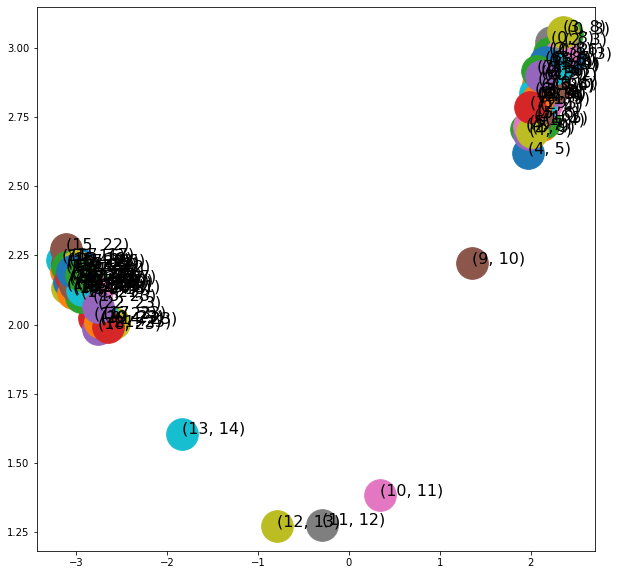

In [17]:
from node2vec.edges import AverageEmbedder
edges_embs = AverageEmbedder(keyed_vectors=model.wv)

import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,10))

for x in G.edges():
    
    v = edges_embs[(str(x[0]), str(x[1]))]
    ax.scatter(v[0],v[1], s=1000)
    ax.annotate(str(x), (v[0],v[1]), fontsize=16)

plt.show()

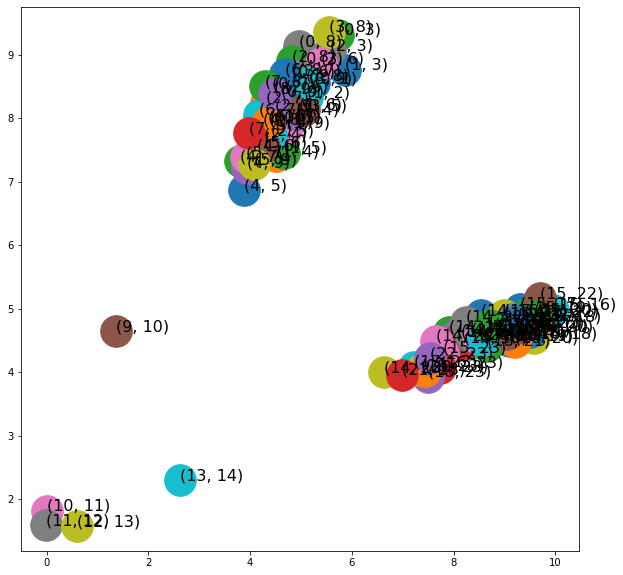

In [18]:
from node2vec.edges import HadamardEmbedder
edges_embs = HadamardEmbedder(keyed_vectors=model.wv)

import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,10))

for x in G.edges():
    
    v = edges_embs[(str(x[0]), str(x[1]))]
    ax.scatter(v[0],v[1], s=1000)
    ax.annotate(str(x), (v[0],v[1]), fontsize=16)

plt.show()

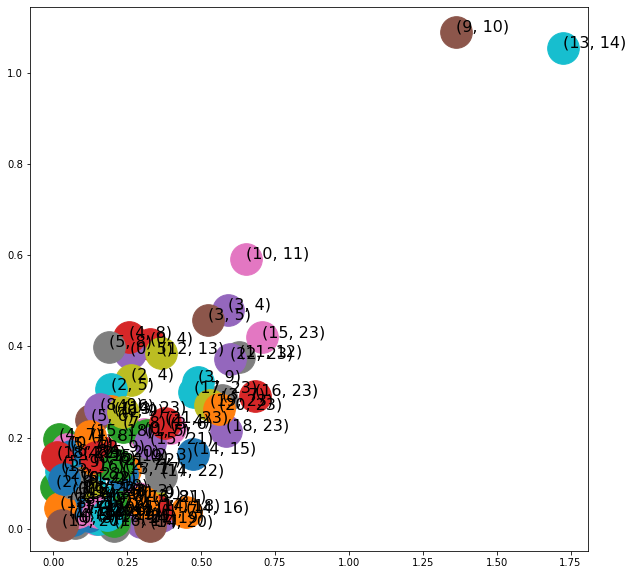

In [19]:
from node2vec.edges import WeightedL1Embedder
edges_embs = WeightedL1Embedder(keyed_vectors=model.wv)

import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,10))

for x in G.edges():
    
    v = edges_embs[(str(x[0]), str(x[1]))]
    ax.scatter(v[0],v[1], s=1000)
    ax.annotate(str(x), (v[0],v[1]), fontsize=16)

plt.show()

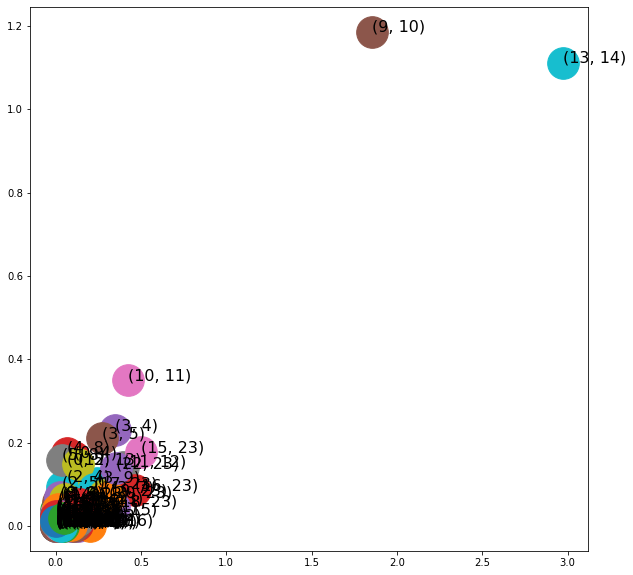

In [20]:
from node2vec.edges import WeightedL2Embedder
edges_embs = WeightedL2Embedder(keyed_vectors=model.wv)

import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,10))

for x in G.edges():
    
    v = edges_embs[(str(x[0]), str(x[1]))]
    ax.scatter(v[0],v[1], s=1000)
    ax.annotate(str(x), (v[0],v[1]), fontsize=16)

plt.show()

## Graph2Vec

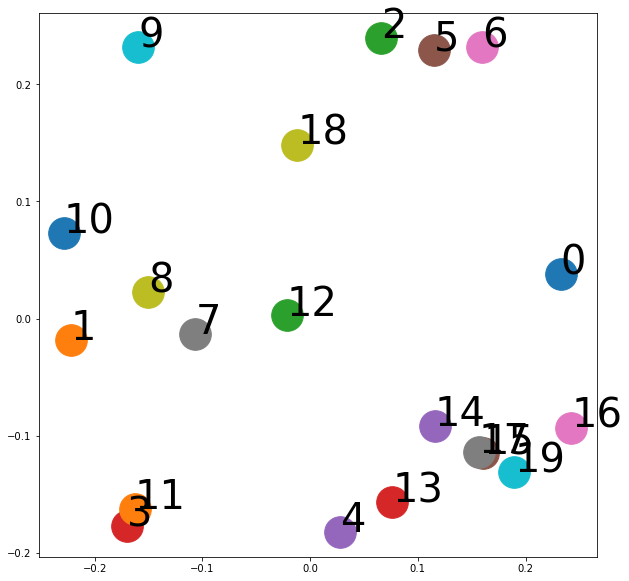

In [21]:
import random
import matplotlib.pyplot as plt
from karateclub import Graph2Vec

n_graphs = 20

def generate_radom():
    n = random.randint(6, 20)
    k = random.randint(5, n)
    p = random.uniform(0, 1)
    return nx.watts_strogatz_graph(n,k,p), [n,k,p]

Gs = [generate_radom() for x in range(n_graphs)]

model = Graph2Vec(dimensions=2, wl_iterations=10)
model.fit([x[0] for x in Gs])
embeddings = model.get_embedding()

fig, ax = plt.subplots(figsize=(10,10))

for i,vec in enumerate(embeddings):
    
    ax.scatter(vec[0],vec[1], s=1000)
    ax.annotate(str(i), (vec[0],vec[1]), fontsize=40)